Here, we are given with a dataset containing 200,000+ Jeopardy! Questions. It has 6 independent features and one dependent feature i.e. 'Value'

**Importing Libraries**

In [43]:
#To perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To perform modeling and training
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

import nltk
nltk.download()
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import re

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#to evaluate the model performances
from sklearn.metrics import classification_report

%matplotlib inline

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
pwd

'D:\\Wysa'

In [3]:
cd archive

D:\Wysa\archive


In [4]:
df = pd.read_csv("JEOPARDY_CSV.csv")

In [5]:
df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [6]:
df.head(5) 

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       216930 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


In [8]:
df.nunique() # It represents unique values in each features 

Show Number      3640
 Air Date        3640
 Round              4
 Category       27995
 Value            150
 Question      216124
 Answer         88268
dtype: int64

Now 'Show Number' has no signifacence on the value of a question and ' Air Date' serves the purpose. So, I am droping the 'Show Number' feature.

In [9]:
df.drop('Show Number', axis=1, inplace=True)

Now let's remove the extra spaces in the column names.

In [10]:
df.rename(columns=lambda x: x.strip(), inplace=True)

Let's drop the rows having 'None' as a 'Value'

In [11]:
df[df['Value'] == 'None']

,Air Date,Round,Category,Value,Question,Answer
55,2004-12-31,Final Jeopardy!,THE SOLAR SYSTEM,None,Objects that pass closer to the sun than Mercu...,Icarus
116,2010-07-06,Final Jeopardy!,HISTORIC WOMEN,None,She was born in Virginia around 1596 & died in...,Pocahontas
174,2000-12-18,Final Jeopardy!,SPORTS LEGENDS,None,If Joe DiMaggio's hitting streak had gone one ...,H.J. Heinz (Heinz 57 Varieties)
235,2000-07-19,Final Jeopardy!,THE MAP OF EUROPE,None,"Bordering Italy, Austria, Hungary & Croatia, i...",Slovenia
296,2006-02-06,Final Jeopardy!,FAMOUS SHIPS,None,"On December 27, 1831 it departed Plymouth, Eng...",the HMS Beagle
...,...,...,...,...,...,...
216686,2001-10-19,Final Jeopardy!,MAJOR LEAGUE BASEBALL TEAM NAMES,None,This team received its name after an 1890 inci...,Pittsburgh Pirates
216746,2010-12-16,Final Jeopardy!,SKYSCRAPERS,None,After a construction boom fueled by oil & gas ...,Moscow
216807,2006-09-29,Final Jeopardy!,NATIONAL CAPITALS,None,"This city's website calls it ""the last divided...",Nicosia
216868,2007-03-23,Final Jeopardy!,BESTSELLING AUTHORS,None,He had the year's bestselling novel a record 7...,John Grisham


In [12]:
df.drop(df[df['Value'] == 'None'].index,inplace=True)

Again we will deal with 'Value' feature later on.

Now let's have a close look on the 'Round' feature.

In [13]:
df['Round'].unique()

array(['Jeopardy!', 'Double Jeopardy!'], dtype=object)

<AxesSubplot:xlabel='Round', ylabel='count'>

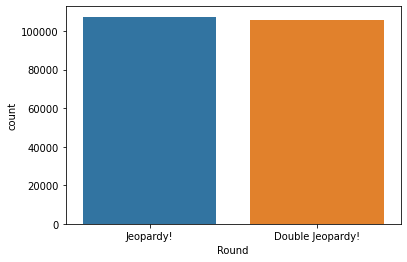

In [14]:
sns.countplot(x='Round',data=df)

So we can see there are very few number of observations in 'Final jeopardy!' & 'Tiebreaker'. So we will remove them.

In [15]:
df = df[~(df['Round'].isin(["Final Jeopardy!", "Tiebreaker"]))]
df.reset_index(inplace=True, drop=True)

Now notice, the 'Value' column is not of numeric type. Let's remove all other characters except numbers.

In [16]:
for i in range(df.shape[0]):
    df['Value'][i] = re.sub('[^0-9]', '', df['Value'][i])

In [17]:
# Type casting as integers
df['Value'] = df['Value'].astype(int)

In [18]:
#Now let's check head and info
df.head()

,Air Date,Round,Category,Value,Question,Answer
0,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona
3,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213296 entries, 0 to 213295
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Air Date  213296 non-null  object
 1   Round     213296 non-null  object
 2   Category  213296 non-null  object
 3   Value     213296 non-null  int32 
 4   Question  213296 non-null  object
 5   Answer    213294 non-null  object
dtypes: int32(1), object(5)
memory usage: 9.0+ MB


In [20]:
#cheeaking missing values
df.isnull().sum()

Air Date    0
Round       0
Category    0
Value       0
Question    0
Answer      2
dtype: int64

In [21]:
df[df['Answer']==None]

,Air Date,Round,Category,Value,Question,Answer


Hence no need to worry about missing values

Now let's focus on 'Air Date'

In [22]:
df['Air Date'] = pd.to_datetime(df['Air Date'])
str(df['Air Date'].dt.date.min()) + ' to ' +str(df['Air Date'].dt.date.max())

'1984-09-10 to 2012-01-27'

<AxesSubplot:xlabel='Air Date'>

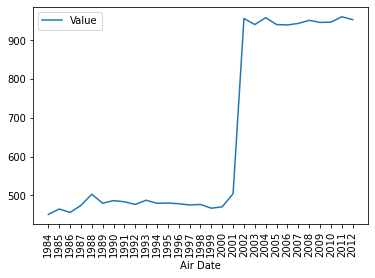

In [23]:
plt_df = df.groupby(df['Air Date'].dt.year).mean('Value')
plt_df.plot(xticks=plt_df.index, rot=90)

So, dates has some effect on the values; it can be seen that around 2002 average value increased suddenly.
So let's create two baskets fo dates pre-2002 and post-2002

In [24]:
df['air_date_group'] = df['Air Date'].apply(lambda x: 'pre-2002' if x.year < 2002 else 'post-2002')
df.drop('Air Date', axis=1, inplace=True)
df.head()

,Round,Category,Value,Question,Answer,air_date_group
0,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus,post-2002
1,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,post-2002
2,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona,post-2002
3,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,post-2002
4,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,post-2002


In [25]:
def binning(value):
    if value < 1000:
        return np.round(value, -2)
    elif value < 10000:
        return np.round(value, -3)
    else:
        return np.round(value, -4)

df['Value'] = df['Value'].apply(binning)

In [36]:
Corpus_Question = ''
lemmatizer = WordNetLemmatizer()
i=0
for val in df['Question']: 
    val = str(val)
    val = val.lower()
    val = val.split()
    val = [lemmatizer.lemmatize(word) for word in val if not word in set(stopwords.words('english'))]
    val = ' '.join(val)
    df['Question'][i] = val
    i = i+1
    Corpus_Question += val

<ipython-input-36-8a845bd2633a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Question'][i] = val


In [41]:
Corpus_Answer = ''
lemmatizer = WordNetLemmatizer()
i=0
for val in df['Answer']: 
    val = str(val)
    val = val.lower()
    val = val.split()
    val = [lemmatizer.lemmatize(word) for word in val if not word in set(stopwords.words('english'))]
    val = ' '.join(val)
    df['Answer'][i] = val
    i = i+1
    Corpus_Answer += val

<ipython-input-41-daff42ebdadf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Answer'][i] = val


In [44]:
df.describe()

,Value
count,213296.000000
mean,762.394513
std,664.001766
min,0.000000
25%,400.000000
50%,600.000000
75%,1000.000000
max,20000.000000


Model creation

In [45]:
y = df['Value']
X = df[['Round', 'Category', 'air_date_group', 'Question', 'Answer']]
column_trans = ColumnTransformer([('Round', OneHotEncoder(dtype='int'),['Round']),
                                  ('air_date_group', OneHotEncoder(dtype='int'),['air_date_group']),
                                  ('Category', OneHotEncoder(dtype='int'),['Category']),
                                  ('Question', TfidfVectorizer(stop_words='english'), 'Question'),
                                  ('Answer', TfidfVectorizer(stop_words='english'), 'Answer')],
                                remainder='drop')
X = column_trans.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Random Forest

In [47]:
clf=RandomForestClassifier(n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [48]:
preds = clf.predict(X_test)
classification_report(y_test, preds)

C:\Users\ASUS\anaconda3\envs\R\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         3\n         100       0.22      0.27      0.25      2669\n         200       0.24      0.28      0.26      9259\n         300       0.17      0.12      0.14      2558\n         400       0.21      0.21      0.21     12673\n         500       0.23      0.17      0.19      2739\n         600       0.18      0.13      0.16      6050\n         700       0.00      0.00      0.00        64\n         800       0.19      0.10      0.13      9427\n         900       0.00      0.00      0.00        37\n        1000       0.24      0.18      0.20     10216\n        2000       0.39      0.81      0.53      7620\n        3000       0.00      0.00      0.00       313\n        4000       0.00      0.00      0.00       178\n        5000       0.00      0.00      0.00        77\n        6000       0.00      0.00      0.00        49\n        7000       0.00      0.00      0.00        17\n       